# Part 1

In [1]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress

### 1.1 Set up 3 sorting algorithms

In [2]:
# Python implementation of Bubble sort.
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

In [3]:
# Python implementation of Quicksort.
def partition(arr, low, high):
    """Return a pivot element for Quicksort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1 

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot


def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)
        
def quick_sort_simple(data):
    if len(data) > 1:
        less = []
        equal = []
        greater = []
        pivot = data[0]

        for x in data:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)

        return quick_sort_simple(less) + equal + quick_sort_simple(greater)

    else:
        return data

In [4]:
# Python implementation of Merge sort.
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

### 1.2 Apply Unittest 

In [5]:
import unittest

class SortingTest(unittest.TestCase):
    def __init__(self, *args, **kwargs):
        super(SortingTest, self).__init__(*args, **kwargs)
        self.test_arr = [[1], [1, 2], [2, 1], [5, 2, 7, 1, 8], [1, 2, 5, 7, 8],
                [10, 272, 100, -98, 876, 877754, 98124, 0, 1000000, -100]]
        self.test_text_arr = [['cat','dog','bird','aardvark'],['dublin','berlin','Cork']]

    def test_bubble_sort(self):
        """Test bubble sort."""
        for arr in self.test_arr:
            self.assertEqual(sorted(arr), bubble_sort(arr))

    def test_quick_sort_inplace(self):
        """Test quick sort."""
        for arr in self.test_arr:
            quicksort(arr)
            self.assertEqual(arr, sorted(arr))
            
    def test_merge_sort(self):
        """Test merge sort."""
        for arr in self.test_arr:
            self.assertEqual(mergesort(arr), sorted(arr))

#     def test_merge_text_sort(self):
#         for arr in self.test_text_arr:
#             print(mergesort(arr))
#             self.assertEqual(mergesort(arr), sorted(arr))

            
if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_bubble_sort (__main__.SortingTest)
Test bubble sort. ... ok
test_merge_sort (__main__.SortingTest)
Test merge sort. ... ok
test_quick_sort_inplace (__main__.SortingTest)
Test quick sort. ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.006s

OK


### 1.3 Testing Running Time

### Create an descending order list which contains 500 elements 

In [6]:
reversed_list = list(reversed(range(10, 5001,10)))
print(reversed_list)

[5000, 4990, 4980, 4970, 4960, 4950, 4940, 4930, 4920, 4910, 4900, 4890, 4880, 4870, 4860, 4850, 4840, 4830, 4820, 4810, 4800, 4790, 4780, 4770, 4760, 4750, 4740, 4730, 4720, 4710, 4700, 4690, 4680, 4670, 4660, 4650, 4640, 4630, 4620, 4610, 4600, 4590, 4580, 4570, 4560, 4550, 4540, 4530, 4520, 4510, 4500, 4490, 4480, 4470, 4460, 4450, 4440, 4430, 4420, 4410, 4400, 4390, 4380, 4370, 4360, 4350, 4340, 4330, 4320, 4310, 4300, 4290, 4280, 4270, 4260, 4250, 4240, 4230, 4220, 4210, 4200, 4190, 4180, 4170, 4160, 4150, 4140, 4130, 4120, 4110, 4100, 4090, 4080, 4070, 4060, 4050, 4040, 4030, 4020, 4010, 4000, 3990, 3980, 3970, 3960, 3950, 3940, 3930, 3920, 3910, 3900, 3890, 3880, 3870, 3860, 3850, 3840, 3830, 3820, 3810, 3800, 3790, 3780, 3770, 3760, 3750, 3740, 3730, 3720, 3710, 3700, 3690, 3680, 3670, 3660, 3650, 3640, 3630, 3620, 3610, 3600, 3590, 3580, 3570, 3560, 3550, 3540, 3530, 3520, 3510, 3500, 3490, 3480, 3470, 3460, 3450, 3440, 3430, 3420, 3410, 3400, 3390, 3380, 3370, 3360, 3350, 334

In [7]:
def sort_time(input_list,function):
    """Take a list and a function
    Return the running time when running the function with the list as input"""
    start_time = time.perf_counter()
    function(input_list)
    end_time = time.perf_counter()
    return end_time-start_time

### Implement running time testing and plot showing methods

In [8]:
def running_time_test(input_list,sort_function):
    running_time=[]
    input_num=[]
    for i in range (10,500,10):
        running_time_temp=0
        list_slice=input_list[:i]
        input_num.append(i)
#run 10 times every input list slice and get the average running time
        for j in range (10): 
             running_time_temp += sort_time(list_slice,sort_function)
        running_time.append(running_time_temp/10)
    print(input_num)    
    print(running_time)
    return input_num,running_time

In [9]:
def show_plot_single_line(input_num,time_list):
    fig, ax = plt.subplots()
    
    ax.plot(input_num,time_list)
      
#     ax.legend()

    ax.set_xlabel('Number of Input Elememts')
    ax.set_ylabel('Running Time') 

    plt.show()

### Bubble sort algorithm's running time as a funcion of input size

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
[1.7229099999838126e-05, 5.3362399999912216e-05, 0.00011231270000067184, 0.00023535830000085412, 0.0005655707999995485, 0.0005525833000003643, 0.0005216459999999757, 0.0005016666999999586, 0.0005864874999996772, 0.0007328542999996302, 0.0008911920000002737, 0.0009306333999997918, 0.0009334208999998595, 0.0009060540000000117, 0.000923025099999819, 0.0009502958000002337, 0.0009579831999992905, 0.0010698832999995744, 0.0011903999999994142, 0.0013155000999997668, 0.0014498833000004651, 0.0015883626000000816, 0.0017331333999994313, 0.0018863458999998528, 0.0020447749000002346, 0.002220866599999738, 0.0024098958999992704, 0.002604083500000698, 0.0028297500000004304, 0.0030417876000004896, 0.003250762500000093, 0.0034730290999998915, 0.0037064500999999693, 0.0

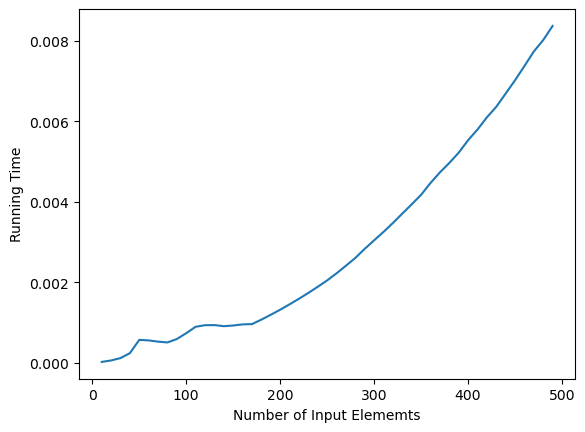

In [10]:
input_nums, bubblesort_running_times = running_time_test(reversed_list, bubble_sort)
show_plot_single_line(input_nums, bubblesort_running_times)

### testing traditional quick sort algorithm's running time and draw the plot

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
[4.252499999992665e-05, 0.00012882900000121822, 0.00036010420000067713, 0.0006121623999995052, 0.0007294831999999473, 0.0006531123999998556, 0.0007739626000024203, 0.0010811999999994272, 0.0011409500999995715, 0.001136704099999264, 0.0011392584000013528, 0.0011629208000009327, 0.0011947915999996894, 0.0013784209000007764, 0.001559704199999601, 0.001759958400000272, 0.00197970410000039, 0.0022156124999980877, 0.0024544498999993893, 0.002724441800000221, 0.00298604580000017, 0.00327272089999866, 0.003582129299998371, 0.003915950000000379, 0.00426915839999964, 0.0046053043000007675, 0.004946241599999723, 0.005301433299999303, 0.005658074999998775, 0.00606895830000056, 0.0065057125000002715, 0.00694086240000118, 0.007391508300000282, 0.007846112399999328, 0

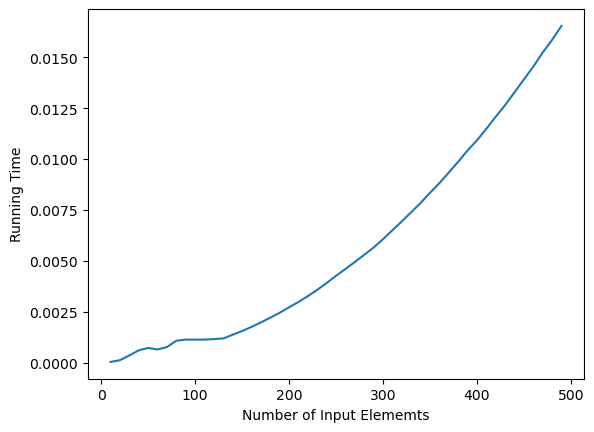

In [11]:
input_nums, quicksort_running_times = running_time_test(reversed_list, quicksort)
show_plot_single_line(input_nums, quicksort_running_times)

### testing simple quick sort algorithm's running time and draw the plot

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
[2.432080000005499e-05, 0.0001240708000004531, 0.0003622708000008856, 0.00033712070000007087, 0.0004892749999996227, 0.0005136457999988409, 0.0005075751999982003, 0.0005898167999994541, 0.0006625248999995393, 0.0008994458999985966, 0.0009776082999984226, 0.0009872291999982962, 0.0009751419000011196, 0.0009584624000005704, 0.0009671750000002533, 0.0009757583999991937, 0.001093037500000804, 0.0012076709000005792, 0.0013391543000011552, 0.001478066700000369, 0.0016225625999993555, 0.0017772250000000155, 0.0019510001000000443, 0.0021039167000004967, 0.00242757919999832, 0.0026537500999999964, 0.002811970699998767, 0.003025937499999287, 0.0032372000999998816, 0.0034560668000004568, 0.0036693958000007854, 0.0038940083000007066, 0.004134166700000464, 0.0043589

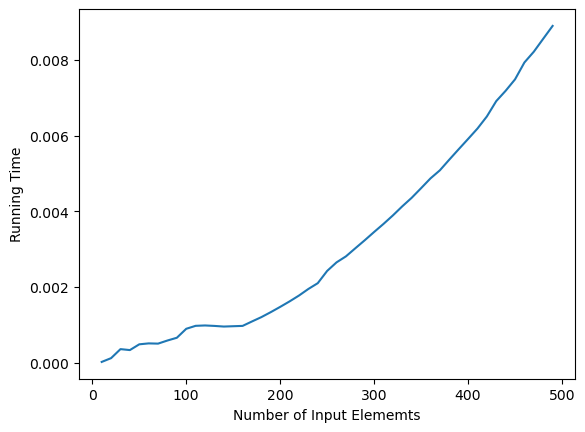

In [12]:
input_nums, quicksort_simple_running_times = running_time_test(reversed_list, quick_sort_simple)
show_plot_single_line(input_nums, quicksort_simple_running_times)

### Merge sort algorithm's running time as a funcion of input size

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
[5.141669999915166e-05, 0.00018695830000012848, 0.00029696259999880683, 0.00028465440000076115, 0.0003886251999993817, 0.000321804299999684, 0.0003589333999990174, 0.0003117793000008362, 0.00031021250000193843, 0.00029510849999923037, 0.0003442375000005882, 0.00035220000000038, 0.0004180252000004714, 0.0004805544999982203, 0.0005335667999986527, 0.0005175374000003785, 0.0005158876999999506, 0.0005025082999999597, 0.00048637089999985504, 0.00045743340000043987, 0.00046892100000022195, 0.0004526082999994685, 0.00045182509999932565, 0.00045976250000094864, 0.00044989579999850094, 0.00044634990000034234, 0.0004579043999996202, 0.00047850409999981023, 0.0005062208999987661, 0.0005197043000002566, 0.0005394459000008567, 0.000555766700000504, 0.000575700099996

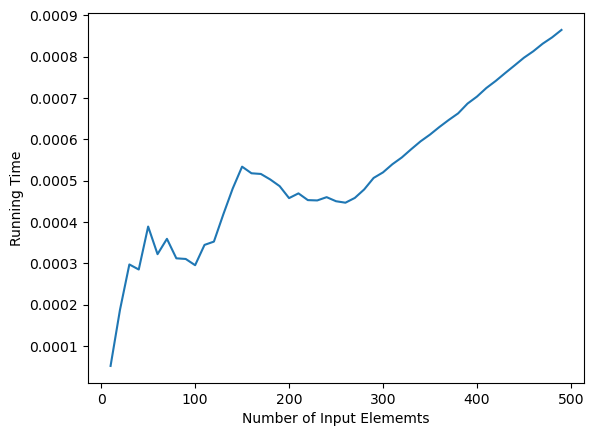

In [13]:
input_nums, mergesort_running_times = running_time_test(reversed_list, mergesort)
show_plot_single_line(input_nums, mergesort_running_times)

### Analysis of the different running time among different sorting algorithm and explain the reason

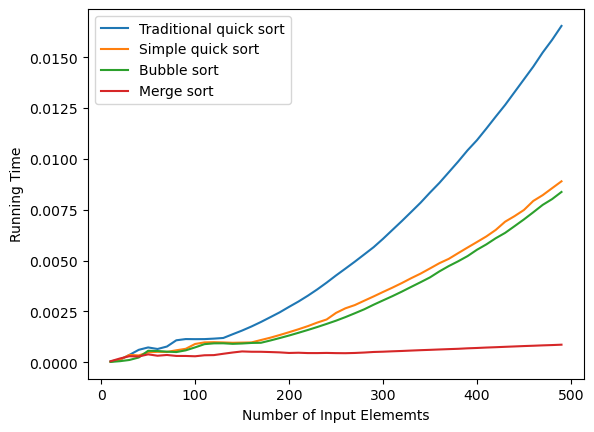

In [14]:
fig, ax = plt.subplots()
ax.plot(input_nums,quicksort_running_times, label="Traditional quick sort")
ax.plot(input_nums,quicksort_simple_running_times, label="Simple quick sort")
ax.plot(input_nums,bubblesort_running_times,label="Bubble sort")
ax.plot(input_nums,mergesort_running_times,label="Merge sort")
ax.legend()
ax.set_xlabel('Number of Input Elememts')
ax.set_ylabel('Running Time') 
plt.show()

### 1.4 Running time curve fitting 

In [196]:
#after the 3 sorting algorithms finish we can do curve fitting and the method can be adjustd 

### 1.5 Obtained results and initial input data discussion

# Part 3

### create an empty weighted graph, G and add vertices (nodes) with their weights given in table to G

In [76]:
import collections
import math
 
class Graph:
    def __init__(self):
        self.vertices = set()
        # makes the default value for all vertices an empty list
        self.edges = collections.defaultdict(list)
        self.weights = {}
 
    def add_vertex(self, value):
        self.vertices.add(value)
 
    def add_edge(self, from_vertex, to_vertex, distance):
        if from_vertex == to_vertex: pass  # no cycles allowed 不允许自环
        self.edges[from_vertex].append(to_vertex)
        self.edges[to_vertex].append(from_vertex) 
        self.weights[(from_vertex, to_vertex)] = distance
        self.weights[(to_vertex, from_vertex)] = distance 
 
    def __str__(self):
        string = "Vertices: " + str(self.vertices) + "\n"
        string += "Edges: " + str(self.edges) + "\n"
        string += "Weights: " + str(self.weights)
        return string

In [79]:
g = Graph()

g.add_vertex("1")
g.add_vertex("2")
g.add_vertex("3")
g.add_vertex("4")
g.add_vertex("5")
g.add_vertex("6")
g.add_vertex("7")
g.add_vertex("8")

g.add_edge("1", "2", 240)
g.add_edge("1", "3", 210)
g.add_edge("1", "4", 340)
g.add_edge("1", "5", 280)
g.add_edge("1", "6", 200)
g.add_edge("1", "7", 345)
g.add_edge("1", "8", 120)
g.add_edge("2", "3", 265)
g.add_edge("2", "4", 175)
g.add_edge("2", "5", 215)
g.add_edge("2", "6", 180)
g.add_edge("2", "7", 185)
g.add_edge("2", "8", 155)
g.add_edge("3", "4", 260)
g.add_edge("3", "5", 115)
g.add_edge("3", "6", 350)
g.add_edge("3", "7", 435)
g.add_edge("3", "8", 195)
g.add_edge("4", "5", 160)
g.add_edge("4", "6", 330)
g.add_edge("4", "7", 295)
g.add_edge("4", "8", 230)
g.add_edge("5", "6", 360)
g.add_edge("5", "7", 400)
g.add_edge("5", "8", 170)
g.add_edge("6", "7", 175)
g.add_edge("6", "8", 205)
g.add_edge("7", "8", 305)

print(g)

Vertices: {'5', '4', '7', '6', '3', '2', '8', '1'}
Edges: defaultdict(<class 'list'>, {'1': ['2', '3', '4', '5', '6', '7', '8'], '2': ['1', '3', '4', '5', '6', '7', '8'], '3': ['1', '2', '4', '5', '6', '7', '8'], '4': ['1', '2', '3', '5', '6', '7', '8'], '5': ['1', '2', '3', '4', '6', '7', '8'], '6': ['1', '2', '3', '4', '5', '7', '8'], '7': ['1', '2', '3', '4', '5', '6', '8'], '8': ['1', '2', '3', '4', '5', '6', '7']})
Weights: {('1', '2'): 240, ('2', '1'): 240, ('1', '3'): 210, ('3', '1'): 210, ('1', '4'): 340, ('4', '1'): 340, ('1', '5'): 280, ('5', '1'): 280, ('1', '6'): 200, ('6', '1'): 200, ('1', '7'): 345, ('7', '1'): 345, ('1', '8'): 120, ('8', '1'): 120, ('2', '3'): 265, ('3', '2'): 265, ('2', '4'): 175, ('4', '2'): 175, ('2', '5'): 215, ('5', '2'): 215, ('2', '6'): 180, ('6', '2'): 180, ('2', '7'): 185, ('7', '2'): 185, ('2', '8'): 155, ('8', '2'): 155, ('3', '4'): 260, ('4', '3'): 260, ('3', '5'): 115, ('5', '3'): 115, ('3', '6'): 350, ('6', '3'): 350, ('3', '7'): 435, ('7',

### draw G for the position (pos) parameter

Using the MDS method to align the distances between each vertex and the length of the edges in the graph. Firstly, the Dijkstra algorithm is applied to compute the shortest distance between all pairs of vertices. Then, these distances are used as input to calculate the vertex positions in two dimensions using the MDS method from the scikit-learn library. Finally, these positions are used to draw the graph.

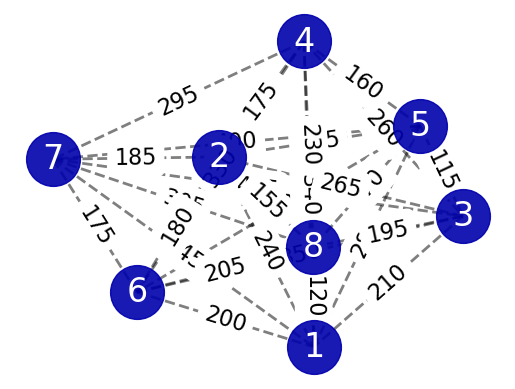

In [82]:
import numpy as np
from sklearn.manifold import MDS

# Calculate all-pairs shortest paths
shortest_paths = nx.all_pairs_dijkstra_path_length(G)

# Create a distance matrix
distance_matrix = np.zeros((len(G.nodes), len(G.nodes)))
for source, paths in shortest_paths:
    for target, distance in paths.items():
        distance_matrix[int(source)-1, int(target)-1] = distance

# Perform MDS
embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pos = embedding.fit_transform(distance_matrix)

# Normalize the positions to [-1, 1]
pos = (pos - pos.min(axis=0)) / (pos.max(axis=0) - pos.min(axis=0)) * 2 - 1

# Convert the positions to a dictionary
pos_dict = {str(i + 1): pos[i] for i in range(len(G.nodes))}

# Draw the nodes, edges, and labels
nx.draw_networkx_nodes(G, pos_dict, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos_dict, width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos_dict, font_size=24, font_family='sans-serif', font_color='white')

# Add edge labels for weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos_dict, edge_labels=edge_labels, font_size=16, font_family='sans-serif')

# Turn off axis
limits = plt.axis('off')

# Show the plot
plt.show()


### compute the MST using Prims algorithm and print a list that contains the minimum spanning tree.


In [83]:
from queue import PriorityQueue

def prim(graph, start_vertex):
    mst = Graph()
    visited = set()
    vertices = list(graph.vertices)
    edges = PriorityQueue()

    for vertex in graph.vertices:
        mst.add_vertex(vertex)

    visited.add(start_vertex)
    for neighbor in graph.edges[start_vertex]:
        edges.put((graph.weights[start_vertex, neighbor], start_vertex, neighbor))

    while not edges.empty():
        weight, current_vertex, next_vertex = edges.get()
        if next_vertex not in visited:
            visited.add(next_vertex)
            mst.add_edge(current_vertex, next_vertex, weight)

            for neighbor in graph.edges[next_vertex]:
                if neighbor not in visited:
                    edges.put((graph.weights[next_vertex, neighbor], next_vertex, neighbor))

    return mst

# Find the minimum spanning tree using Prim's algorithm
mst = prim(g, "1")
print(mst)


Vertices: {'5', '7', '4', '6', '3', '2', '8', '1'}
Edges: defaultdict(<class 'list'>, {'1': ['8'], '8': ['1', '2', '5'], '2': ['8', '6'], '5': ['8', '3', '4'], '3': ['5'], '4': ['5'], '6': ['2', '7'], '7': ['6']})
Weights: {('1', '8'): 120, ('8', '1'): 120, ('8', '2'): 155, ('2', '8'): 155, ('8', '5'): 170, ('5', '8'): 170, ('5', '3'): 115, ('3', '5'): 115, ('5', '4'): 160, ('4', '5'): 160, ('2', '6'): 180, ('6', '2'): 180, ('6', '7'): 175, ('7', '6'): 175}


### draw the MST graph

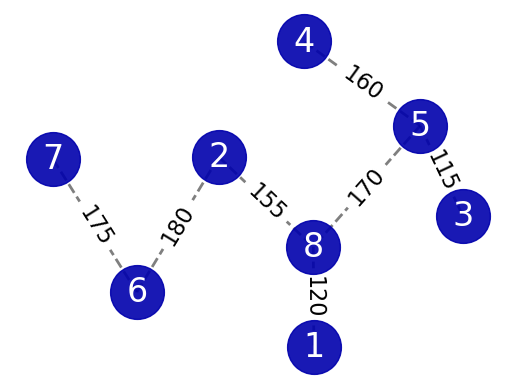

In [91]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a networkx graph for the minimum spanning tree
mst_nx = nx.Graph()

# Add vertices and edges with their weights
for vertex in mst.vertices:
    mst_nx.add_node(vertex)

for (from_vertex, to_vertex), weight in mst.weights.items():
    mst_nx.add_edge(from_vertex, to_vertex, weight=weight)
    
pos_dict = {str(i + 1): pos[i] for i in range(len(G.nodes))}
   
nx.draw_networkx_nodes(mst_nx, pos_dict, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(mst_nx, pos_dict, width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(mst_nx, pos_dict, font_size=24, font_family='sans-serif', font_color='white')    

edge_labels = nx.get_edge_attributes(mst_nx, 'weight')
nx.draw_networkx_edge_labels(mst_nx, pos_dict, edge_labels=edge_labels, font_size=16, font_family='sans-serif')

limits = plt.axis('off')

plt.show()
